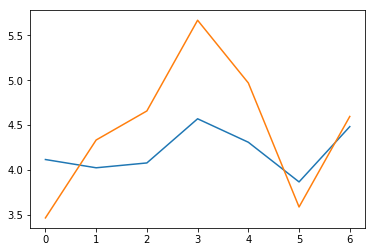

In [200]:
import pandas as pd
#import datetime
import matplotlib.pyplot as plt

df=pd.read_csv("estacion_1_2011_2014.csv",sep=";")
#df=df.dropna()

df['day']=pd.to_datetime(df["date"]).dt.weekday
df['month']=pd.to_datetime(df["date"]).dt.month
dfsummer=df[(df["month"]>5) & (df["month"]<9)]
df['dayd']=pd.to_datetime(df["date"]).dt.day
dffallas=df[(df["month"]==3) & (df["dayd"]>14) & (df["dayd"]<20)]

byday=df.groupby('day').mean()
bydaysum=dfsummer.groupby('day').mean()
bymonth=df.groupby('month').mean()
bydaydfallas=dffallas.groupby('dayd').mean()
byday_s=byday.sort_values(by="avg_available")

plt.plot(byday.index,byday.avg_available)
plt.plot(bydaysum.index,bydaysum.avg_available)
plt.show()  


##uncomment someone to get corresponding table answer
#byday_s
#bymonth.sort_values(by="avg_available")
#bydaysum.sort_values(by="avg_available")
#bydaydfallas

#1) least avg_avalable day Saturday 3.866332
#2) most avg_available Thursday 4.570446
#3) least avg_available month - march 1.575160 (could be coz of rare data on fallas, so better exclude this type of data)
#4) yes, it changes(see graph): the avg motnth usage is in medium, comparing with another months, but week usage changes a bit
#   lowest avg_available changes to monday (3.464844) but saturday is close to the same value(3.586928).
#   additionally, we can see, that the lowest usage goes down too - Thursday(5.669355)
#5) yes during fallas acg_available and med_available goes 0. Looks like its closed?